#  Exploratory Data Analysis

In [2]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 15})

In [3]:
df = pd.read_csv('../data/clean_data.csv') #  Load cleaned data

df.columns = [x.lower() for x in df.columns] # column names in lower case

print('Data size',df.shape)
df.head()

Data size (3817613, 23)


,c_year,c_mnth,c_wday,c_hour,fatal,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user,c_case
0,1999,January,Monday,9.0,0,2.0,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1992.0,1.0,F,33.0,Driver,Injury,Safety device used,Motor Vehicle Driver,2890
1,1999,January,Monday,9.0,0,2.0,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1992.0,1.0,F,70.0,Driver,No Injury,Safety device used,Motor Vehicle Driver,2890
2,1999,January,Monday,20.0,0,1.0,Ran off left shoulder,Intersection with parking lot entrance,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1988.0,1.0,F,38.0,Driver,Injury,Safety device used,Motor Vehicle Driver,4332
3,1999,January,Monday,5.0,0,2.0,Hit a moving object,At an intersection,Raining,Wet,...,Other trucks and vans,1995.0,1.0,M,34.0,Driver,No Injury,Safety device used,Motor Vehicle Driver,5053
4,1999,January,Monday,5.0,0,2.0,Hit a moving object,At an intersection,Raining,Wet,...,Other trucks and vans,1995.0,2.0,M,30.0,"Front row, right outboard",No Injury,Safety device used,Motor Vehicle Passenger,5053


In [4]:
df.rename(columns = {'fatal':'class'}, inplace = True)

# Class distribution

In [4]:
label_pct = df['class'].value_counts(normalize = True)*100
label_ct =  df['class'].value_counts()
pd.DataFrame({'labels': label_pct.index, 'count': label_ct.values, 'percentage': label_pct.values})

,labels,count,percentage
0,0,3756304,98.394049
1,1,61309,1.605951


# Descriptive statistics

In [5]:
df.drop('class', axis =1).describe()

,c_year,c_hour,c_vehs,v_id,v_year,p_id,p_age,c_case
count,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06,3.817613e+06
mean,2.007373e+03,1.371886e+01,2.099251e+00,1.548594e+00,1.999937e+03,1.512814e+00,3.664816e+01,1.275838e+06
std,5.455213e+00,5.106257e+00,1.102796e+00,8.167865e-01,7.572315e+00,1.230836e+00,1.868770e+01,7.419594e+05
min,1.999000e+03,0.000000e+00,1.000000e+00,1.000000e+00,1.901000e+03,1.000000e+00,1.000000e+00,1.524000e+03
25%,2.003000e+03,1.000000e+01,2.000000e+00,1.000000e+00,1.995000e+03,1.000000e+00,2.200000e+01,6.370150e+05
50%,2.007000e+03,1.400000e+01,2.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,3.500000e+01,1.272317e+06
75%,2.012000e+03,1.700000e+01,2.000000e+00,2.000000e+00,2.005000e+03,2.000000e+00,5.000000e+01,1.914410e+06
max,2.017000e+03,2.300000e+01,7.700000e+01,7.700000e+01,2.018000e+03,9.300000e+01,9.900000e+01,2.570235e+06


# Correlation matrix

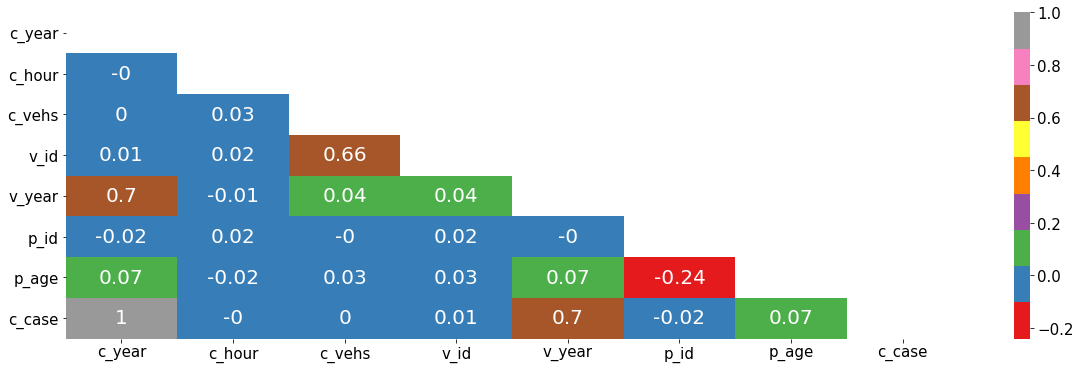

In [6]:
fig, ax = plt.subplots(figsize=(20,6))

# Correlation matrix
corr_matrix = df.drop('class', axis =1).corr()

# Plot
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(round(corr_matrix, 2), annot=True, annot_kws={"size": 20},mask = mask, 
            cmap = plt.get_cmap("Set1"),ax = ax)
plt.show()

# Histogram

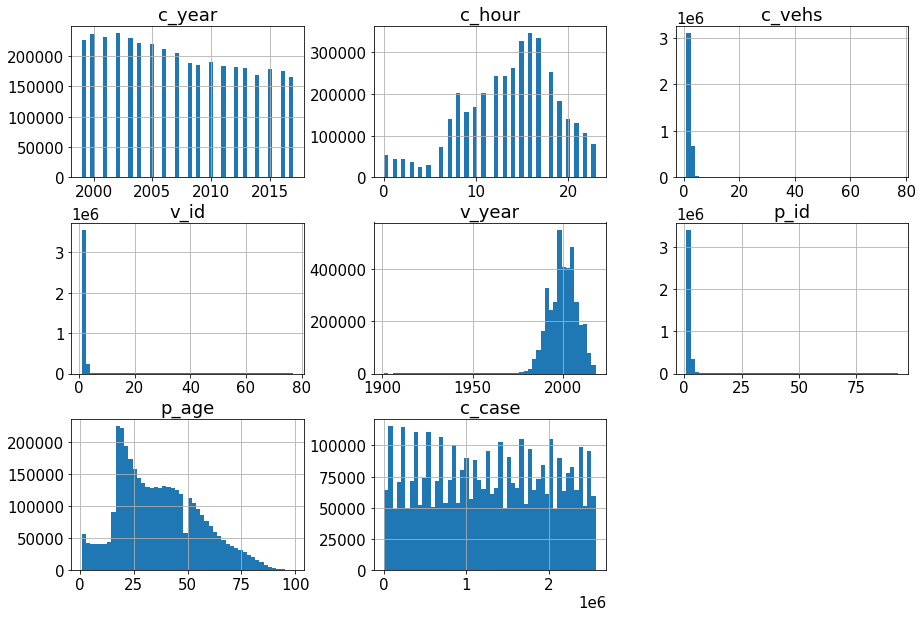

In [7]:
df.drop('class', axis =1).hist(bins = 50, figsize = (15,10))
plt.show()

# Fatality rate by collision hour

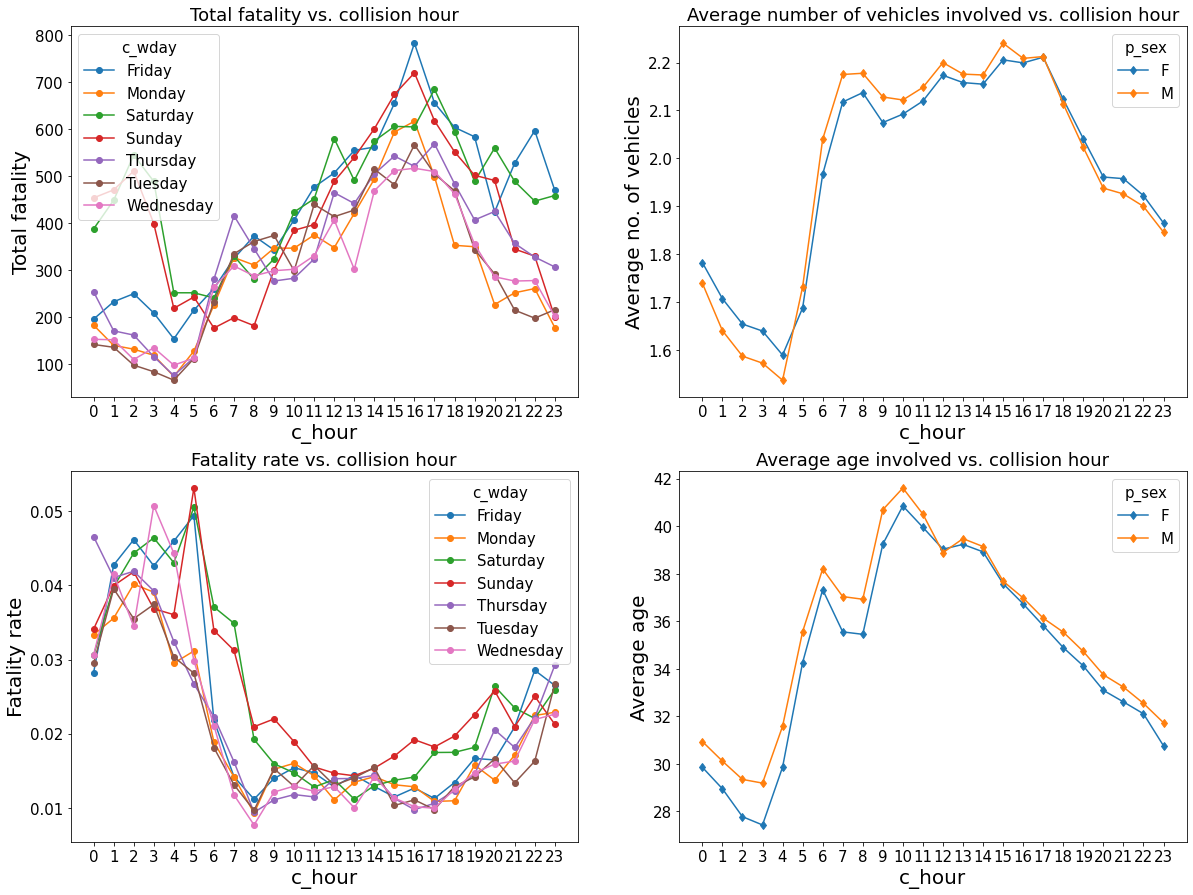

In [8]:
# set figure
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (20,15))

# pivot table
pivot_tab_hr1 = df.pivot_table('class', index = 'c_hour', columns = 'c_wday', aggfunc = 'sum')
pivot_tab_hr2 = df.pivot_table('c_vehs', index = 'c_hour', columns = 'p_sex', aggfunc = 'mean')
pivot_tab_hr3 = df.pivot_table('class', index = 'c_hour', columns = 'c_wday', aggfunc = 'mean')
pivot_tab_hr4 = df.pivot_table('p_age', index = 'c_hour', columns = 'p_sex', aggfunc = 'mean')

# plots
pivot_tab_hr1.plot(marker = 'o', ax = ax1)
pivot_tab_hr2.plot(marker = 'd', ax = ax2)
pivot_tab_hr3.plot(marker = 'o', ax = ax3)
pivot_tab_hr4.plot(marker = 'd', ax = ax4)

ax1.set_xlabel('c_hour', fontsize = 20)
ax1.set_ylabel('Total fatality', fontsize = 20)
ax1.set_title('Total fatality vs. collision hour')
ax1.set_xticks(range(24))
ax2.set_xlabel('c_hour', fontsize = 20)
ax2.set_ylabel('Average no. of vehicles', fontsize = 20)
ax2.set_title('Average number of vehicles involved vs. collision hour')
ax2.set_xticks(range(24))
ax3.set_xlabel('c_hour', fontsize = 20)
ax3.set_ylabel('Fatality rate', fontsize = 20)
ax3.set_title('Fatality rate vs. collision hour')
ax3.set_xticks(range(24))
ax4.set_xlabel('c_hour', fontsize = 20)
ax4.set_ylabel('Average age', fontsize = 20)
ax4.set_title('Average age involved vs. collision hour')
ax4.set_xticks(range(24))

plt.savefig('../image/fig_h.png')

#   Fatality rate by gender
- Almost 1 in 100 females are involved in fatal accidents, whereas 2 in 100 males are involved in fatal accidents. Therefore, the fatality rate is high for males than females.

In [9]:
pvt = df.pivot_table('c_case', index = 'p_sex', columns = 'class', aggfunc = 'count')
pvt['fatality rate'] = [np.around(pvt.values[0][1]/pvt.values[0][0],4),
                        np.around(pvt.values[1][1]/pvt.values[1][0],4)]
pvt

class,0,1,fatality rate
p_sex,,,
F,1744035,20795,0.0119
M,2012269,40514,0.0201


#  Age group are involved in fatal collision

- Young people in their 20s (mostly males) are involved in most fatal collisions
-  Fatality rate is increases in older people

In [10]:
df.pivot_table('p_age', index = 'p_sex', columns = 'class', aggfunc = 'mean')

class,0,1
p_sex,,
F,36.490061,39.067853
M,36.727187,38.287308


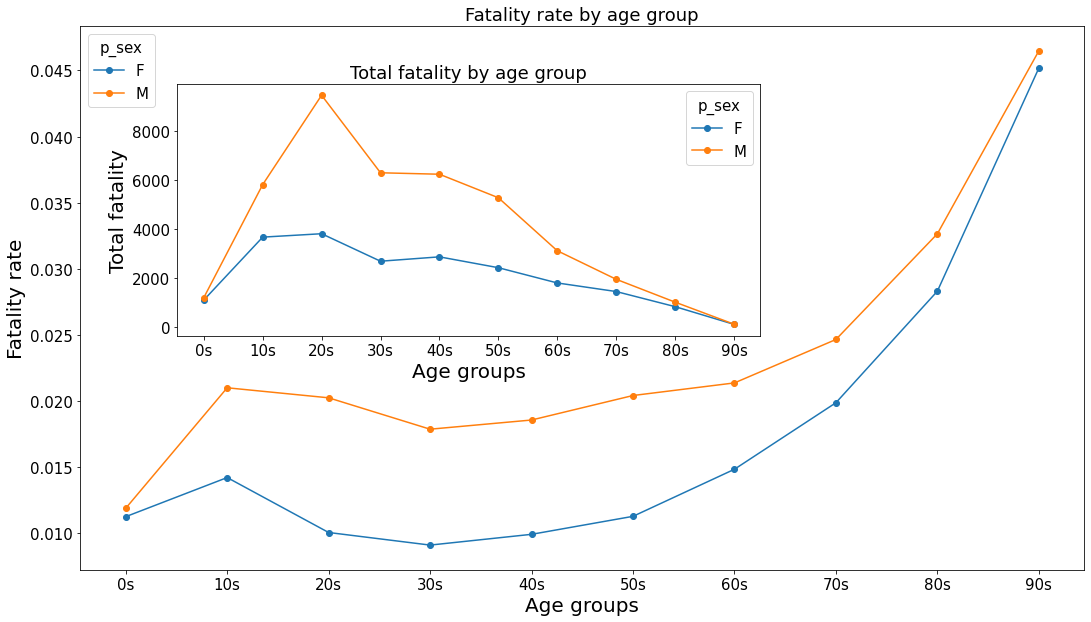

In [11]:
# Creare dataframe
cols = ['p_sex', 'p_age', 'class']
df_p_age = df[cols]
df_p_age['p_age_decade'] = (df_p_age['p_age']//10)*10 # Add age group

# pivot table
pivot_tab_age1 = df_p_age.pivot_table('class', index = 'p_age_decade', columns = 'p_sex', aggfunc = 'sum')
pivot_tab_age2 = df_p_age.pivot_table('class', index = 'p_age_decade', columns = 'p_sex', aggfunc = 'mean')

labels = ['0s', '10s', '20s', '30s', '40s', '50s','60s', '70s', '80s', '90s']

# plots
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.2,0.45,0.45,0.35]
ax2 = fig.add_axes([left, bottom, width, height])

pivot_tab_age2.plot(marker = 'o', ax = ax1)
pivot_tab_age1.plot(marker = 'o', ax = ax2)
ax1.set_xlabel('Age groups', fontsize = 20)
ax1.set_ylabel('Fatality rate', fontsize = 20)
ax1.set_title('Fatality rate by age group')
ax1.set_xticks(list(pivot_tab_age1.index))
ax1.set_xticklabels(labels)
ax2.set_xlabel('Age groups', fontsize = 20)
ax2.set_ylabel('Total fatality', fontsize = 20)
ax2.set_title('Total fatality by age group')
ax2.set_xticks(list(pivot_tab_age1.index))
ax2.set_xticklabels(labels)
plt.savefig('../image/fig3a.png')

# Age distribution among fatal collision

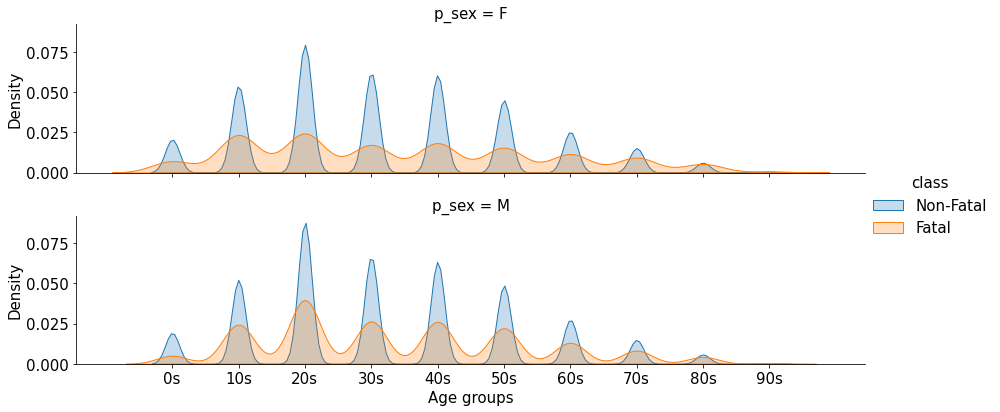

In [12]:
# Map class label
df_p_age['class'] =  df_p_age['class'].map({1:'Fatal', 0:'Non-Fatal'})

# Plot
g = sns.FacetGrid(data = df_p_age.dropna(), hue = 'class',row= 'p_sex',aspect=4)
(g.map(sns.kdeplot, 'p_age_decade', fill = True)\
    .set_axis_labels("Age groups","Density")\
        .add_legend()
        )

labels = ['0s', '10s', '20s', '30s', '40s', '50s','60s', '70s', '80s', '90s']
plt.xticks(np.arange(0,100,10),labels)
plt.savefig('../image/fig3b.png')
plt.show()

#  Vehicle model year was involved in most fatal collisions
-  The light duty 2000s (i.e. 2000-2009) model vehicles are involved in the most fatal collisions.

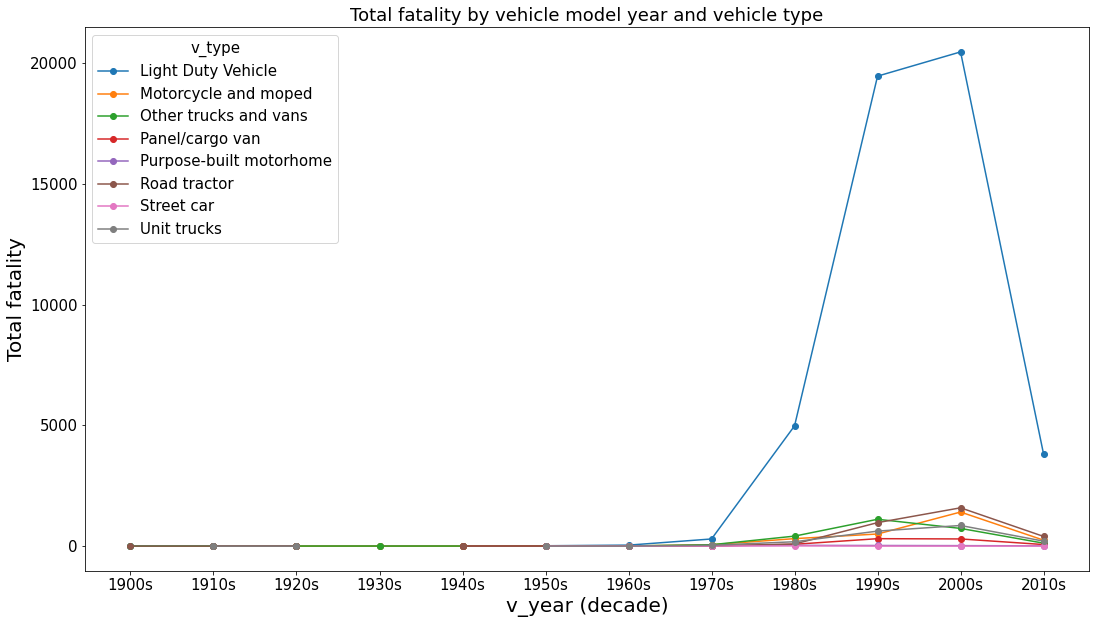

In [13]:
# Create dataframe
cols = ['v_year', 'v_type', 'p_sex', 'p_age', 'class']
df_v_year = df[cols]
df_v_year['v_year_decade'] = (df_v_year['v_year']//10)*10

# pivot table
pivot_tab_vyr = df_v_year.pivot_table('class', index = 'v_year_decade', columns = 'v_type', aggfunc = 'sum')

labels = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s',
        '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'
        ]
drop_cols = ['Fire engine', 'Smaller school bus', 'School bus', 
            'Urban and Intercity Bus', 'Bicycle']
# plots
fig, ax = plt.subplots(figsize=(18, 10))

pivot_tab_vyr.drop(drop_cols, axis =1).plot(marker = 'o', ax = ax)
ax.set_xlabel('v_year (decade)', fontsize = 20)
ax.set_ylabel('Total fatality', fontsize = 20)
ax.set_xticks(np.arange(1900,2020,10))
ax.set_xticklabels(labels)
ax.set_title('Total fatality by vehicle model year and vehicle type')
plt.savefig('../image/fig5.png')

# Collision distribution of vehicle model year by gender
- The vehicle models in 2000s are involved in most fatal collisions.

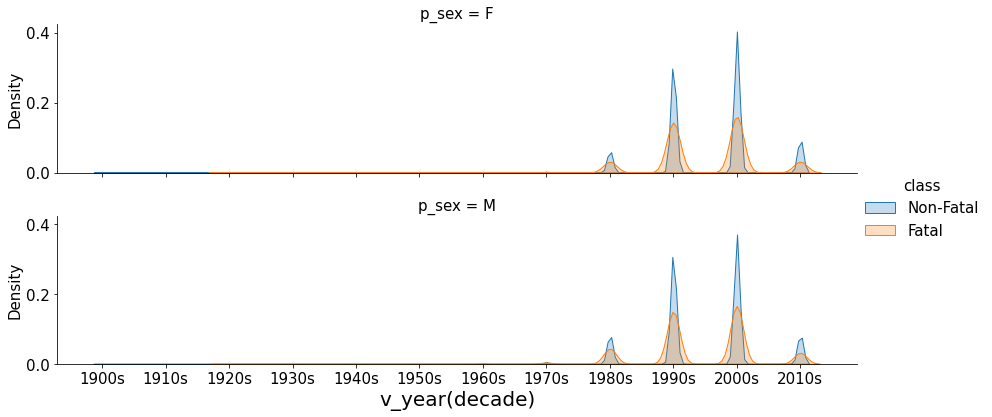

In [14]:
# Create dataframe
cols = ['v_year', 'p_sex', 'p_age', 'class']
df_v_year = df[cols]
df_v_year['v_year_decade'] = (df_v_year['v_year']//10)*10
df_v_year['class'] =  df_v_year['class'].map({1:'Fatal', 0:'Non-Fatal'})

# plot
g = sns.FacetGrid(data = df_v_year.dropna(), hue = 'class',row = 'p_sex', aspect =4)  
(g.map(sns.kdeplot, 'v_year_decade', fill = True)\
    .set_axis_labels("Vehicle model year","Density")\
        .add_legend())

labels = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s',
        '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'
        ]

plt.xlabel("v_year(decade)", fontsize = 20)
plt.xticks(np.arange(1900,2020,10), labels)
plt.savefig('../image/fig7.png')

#  Fatality rate of males and  females each year
- Fatal collisions were mostly in the years 1999 & 2006 and the weather condition was visibility limited.

- Fatality rate peaked in July 2003

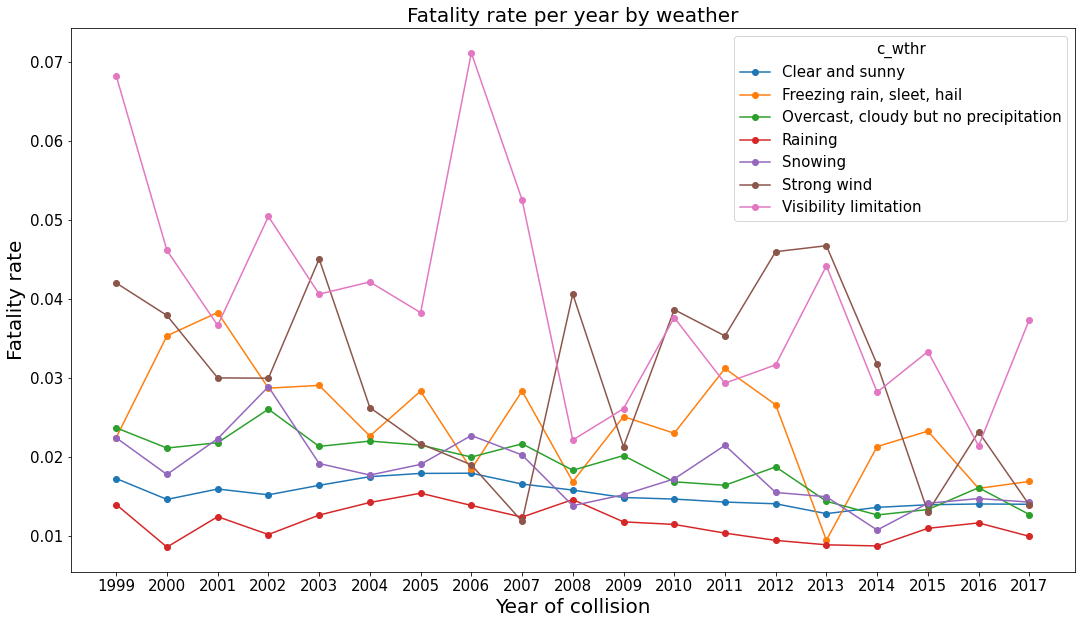

In [15]:
#  Plot figure
table_year = df.pivot_table('class', index = 'c_year', columns = 'c_wthr', aggfunc = 'mean')
table_year.plot(marker = 'o',figsize = (18,10))

plt.xlabel('Year of collision', fontsize = 20)
plt.ylabel('Fatality rate', fontsize = 20)
plt.title('Fatality rate per year by weather', fontsize = 20)
plt.xticks(np.arange(1999,2018,1))
plt.savefig('../image/fig1a.png')

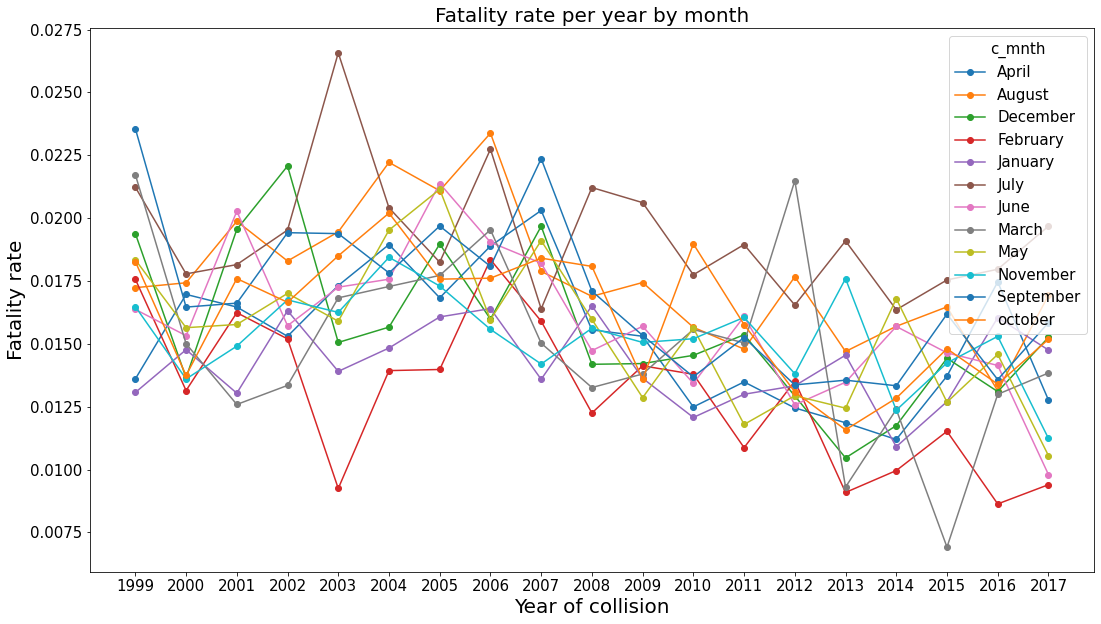

In [16]:
#  Plot figure
table_year = df.pivot_table('class', index = 'c_year', columns = 'c_mnth', aggfunc = 'mean')
table_year.plot(marker = 'o',figsize = (18,10))

plt.xlabel('Year of collision', fontsize = 20)
plt.ylabel('Fatality rate', fontsize = 20)
plt.title('Fatality rate per year by month', fontsize = 20)
plt.xticks(np.arange(1999,2018,1))
plt.savefig('../image/fig1b.png')

# Fatality rate by person position

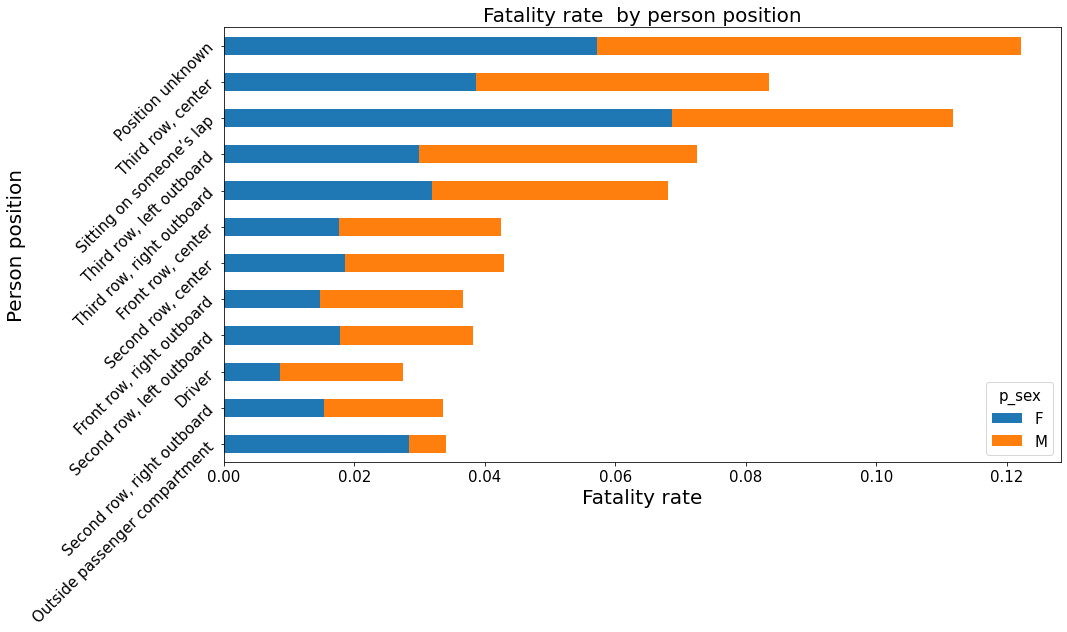

In [17]:
#  Plot figure
table_year = df.pivot_table('class', index = 'p_psn', columns = 'p_sex', aggfunc = 'mean')
table_year.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (15,8))

plt.xlabel('Fatality rate', fontsize = 20)
plt.ylabel('Person position', fontsize = 20)
plt.title('Fatality rate  by person position', fontsize = 20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig_p.png')

# Vechicle types with the most fatal collisions
- Most fatal accident are caused by road tractor

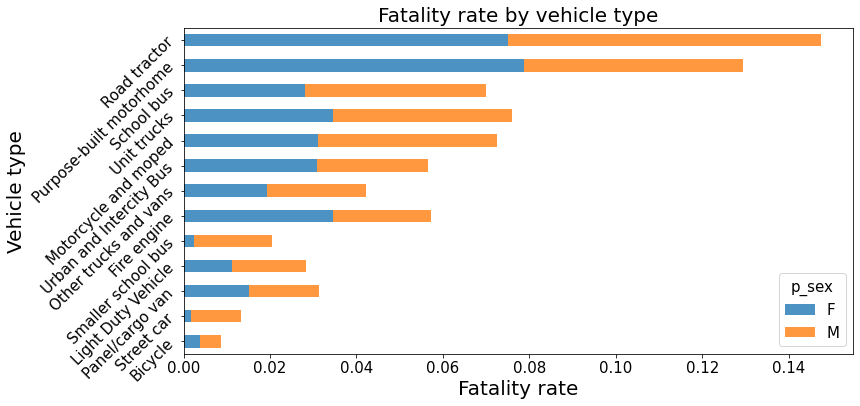

In [18]:
# Plot figure
table_vtype = df.pivot_table('class', index = 'v_type', columns = 'p_sex', aggfunc = 'mean')
table_vtype.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)

plt.ylabel('Vehicle type', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(loc= 'lower right', title = 'p_sex')
plt.title('Fatality rate by vehicle type', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig6.pdf')

#  Fatality rate per month
- Fatal accidents are mostly likely in July and August, i.e. during the summer season. They also occur mostly on weekends

In [5]:
month_dict = {'January':1, 'February':2, 'March':3, 'April':4,  'May':5, 'June':6, 'July':7,'August':8, 'September':9,'October':10, 'November':11, 'December':12}

df['c_mnth'].replace(month_dict, inplace = True)

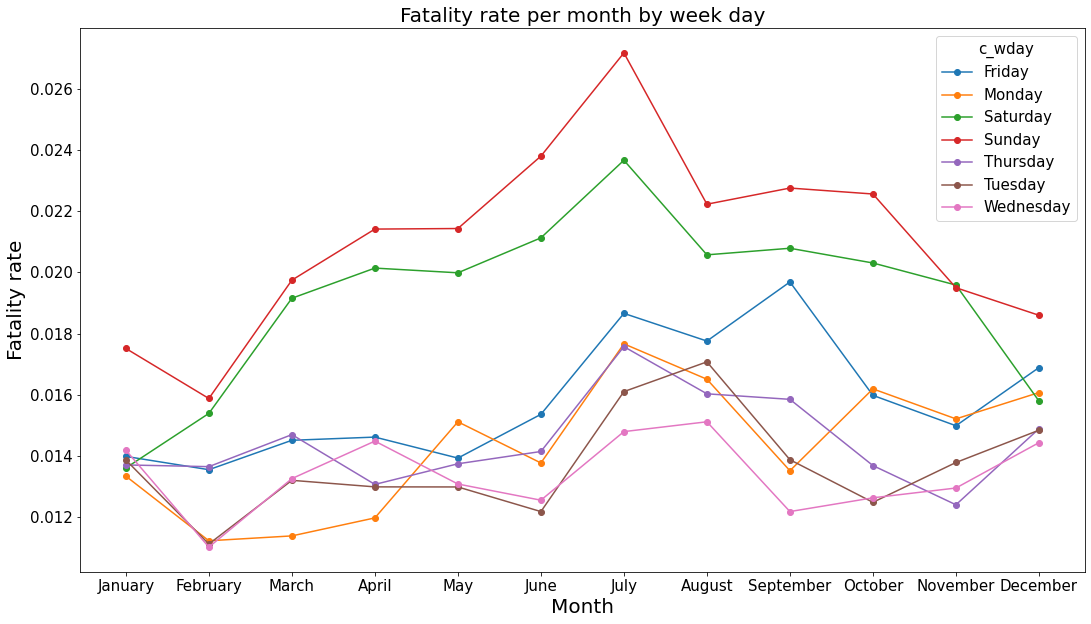

In [28]:
table_month = df.pivot_table('class', index = 'c_mnth', columns = 'c_wday', aggfunc = 'mean')

# Plot figure
table_month.plot(marker = 'o',  figsize = (18,10), linewidth = 1.5)
plt.xlabel('Month', fontsize =20)
plt.ylabel('Fatality rate', fontsize =20)
plt.title('Fatality rate per month by week day', fontsize =20)
plt.xticks(list(table_month.index), list(month_dict.keys()))
plt.savefig('../image/fig9a.png')
plt.show()

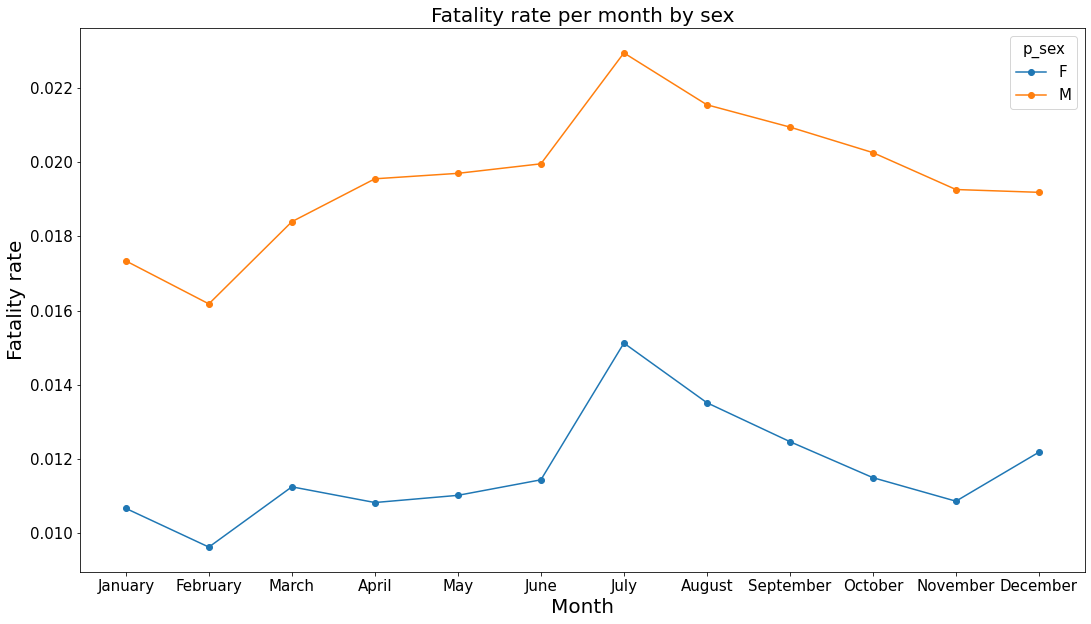

In [6]:
table_month = df.pivot_table('class', index = 'c_mnth', columns = 'p_sex', aggfunc = 'mean')

# Plot figure
table_month.plot(marker = 'o',  figsize = (18,10), linewidth = 1.5)
plt.xlabel('Month', fontsize =20)
plt.ylabel('Fatality rate', fontsize =20)
plt.title('Fatality rate per month by sex', fontsize =20)
plt.xticks(list(table_month.index), list(month_dict.keys()))
plt.savefig('../image/fig9b.png')
plt.show()

#  Fatality rate by weather condition
- The fatal collisions occur mostly due to visibility limitation

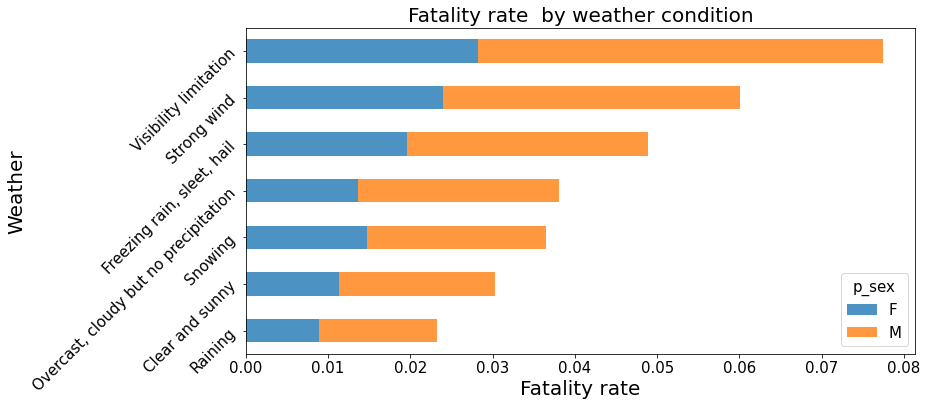

In [22]:
# Plot figure
table_weather = df.pivot_table('class', index = 'c_wthr', columns = 'p_sex', aggfunc = 'mean')
table_weather.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)

plt.ylabel('Weather', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.title('Fatality rate  by weather condition', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig10.pdf')

#  Fatality rate by road configuration
- Most fatal accidents occur at passing or climbing lane

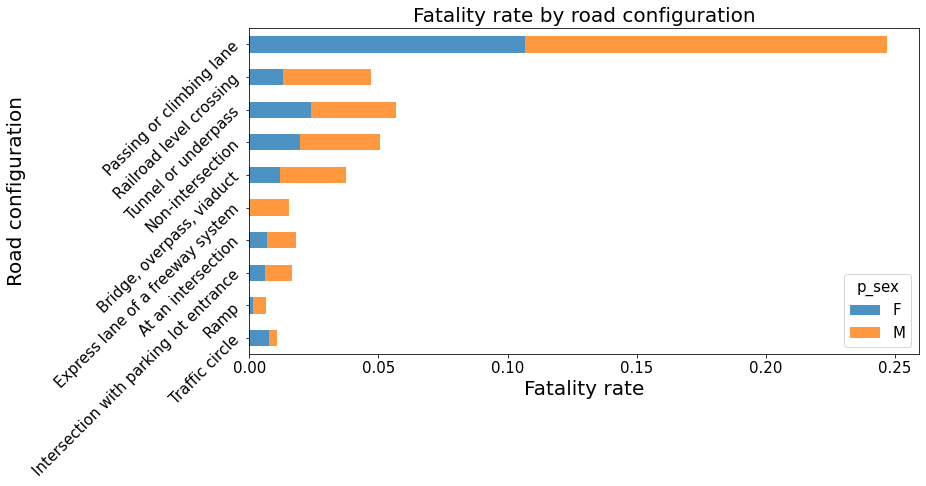

In [23]:
# Plot figure
table_road = df.pivot_table('class', index = 'c_rcfg', columns = 'p_sex', aggfunc = 'mean')
table_road.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)
plt.ylabel('Road configuration', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(title = 'p_sex')
plt.title('Fatality rate by road configuration', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig11.pdf')

#  Fatality rate by Road alignment
- Most fatal accidents occur by curved and gradient road alignment

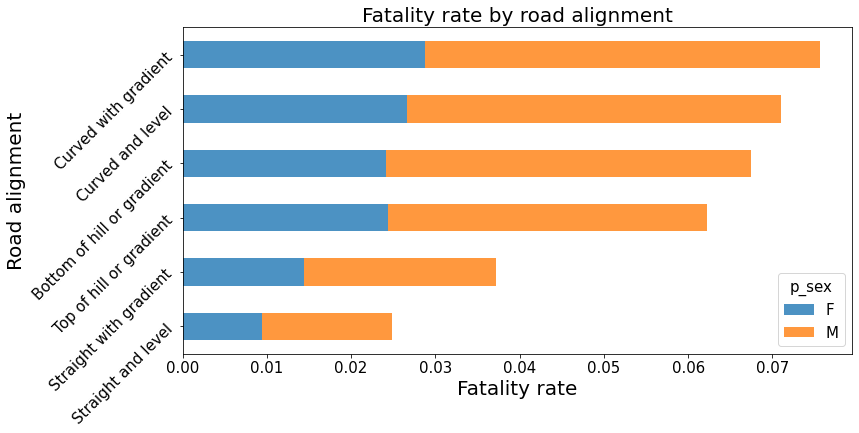

In [24]:
# Plot figure
table_road = df.pivot_table('class', index = 'c_raln', columns = 'p_sex', aggfunc = 'mean')
table_road.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)
plt.ylabel('Road alignment', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(title = 'p_sex')
plt.title('Fatality rate by road alignment', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig13.png')